In [1]:
#INITIALISATIE
import random as random
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [49]:
#EXPRESSIONS IN TERMS OF DELTA'S

#Beetje omslachtig, maar als p=N bereken je Pclv(1). Om Pclv(y) te berekenen doe je
    #LambdaRe(p=N)/LambdaRe(p=y) (Dit is geen typefout ;))
def LambdaRe(Dpam, N, p, MM, Da, Di, Dc):
    cx = 0
    res = 1
    for x in range(1,p):
        cx = cx + ((x) in MM)
        res = res + exp(-(Dpam + (x-1)*Da - Di*cx - Dc*(x==(N-1))))
    LambdaR = 1./res
    return LambdaR

#T(1)
def psiRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin):
    res = 0
    for x in range(1,N):
        clx = 0
        for l in range(1,x+1):
            clx = 0
            for j in range(l,x+1):  
                clx = clx + (j in MM)
            res = res + exp((-Dpam+Da)*(l==1) - Da*(x-l+1) + Di*clx + Dc*(x==(N-1)))
            
    Lambda1 = LambdaRe(Dpam,N,N,MM,Da,Di,Dc)
    psiR = (1./k0)*exp(DGmin)*res
    psiR = psiR*Lambda1 
    return psiR


#Tclv(1)
def tauRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin):
    res = 0
    for x in range(0,N):
        clx = 0
        for l in range(1,x+1):
            clx = 0
            for j in range(l,x+1):  
                clx = clx+ (j in MM)
            Lambdal = LambdaRe(Dpam,N,N,MM,Da,Di,Dc)/LambdaRe(Dpam,N,l,MM,Da,Di,Dc)
            res = res + Lambdal*exp(-((l==1)*(Dpam-Da)+(x-l+1)*Da-clx*Di-(x==N-1)*Dc))   
            
    tauR = (1./k0)*exp(DGmin)*res
    return tauR


#Tub(1)
def tauubRe(Dpam,N,MM,Da,Di,Dc,k0,DGmin):
    res = 0
    for x in range(0,N):
        c = 0
        for l in range(1,x+1):
            c = 0
            for j in range(l,x+1):  
                c = c+ (j in MM)
            lambdal = 1-LambdaRe(Dpam,N,N,MM,Da,Di,Dc)/LambdaRe(Dpam,N,l,MM,Da,Di,Dc)
            res = res + lambdal*exp(-((l==1)*(Dpam-Da)+(x-l+1)*Da-c*Di-(x==N-1)*Dc))   
    
    lambdaclv = LambdaRe(Dpam,N,N,MM,Da,Di,Dc)
    tauR = (1./k0)*exp(DGmin)*res*lambdaclv/(1-lambdaclv)
    return tauR

In [50]:
#CONSTANTS
N = 21         #Position of second absorber/cleavage (Length of state space)

[Dpam,Da,Di,Dc] = [3,1,8,2] #Kies je parameters. Let op, Da = Delta_C en Dc = Delta_CLV

k0 = 1         #Constante in rates
DGmin = .0     #Delta G^-

In [51]:
#Algemene functie

Lambda = []
psi = []
tau = []
tauub = []
for x in range(2,N):  #2,N
    print x
    MM = [x]
    Lambda.append(LambdaRe(Dpam, N, N, MM, Da, Di, Dc))
    psi.append(psiRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin))
    tau.append(tauRe(Dpam, N, MM, Da, Di, Dc, k0, DGmin))
    tauub.append(tauubRe(Dpam,N,MM,Da,Di,Dc,k0,DGmin))



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


 MM           Lambda              psi              tau            tauub
  2  0.0114386644501    20.9913924675    35.3414342481    20.8253478258
  3  0.0304479263624    73.6397548071    90.7465110942    73.1025322382
  4     0.0783443635    206.294558101    232.178207116    204.094345867
  5   0.185957156342    504.341129351    551.543347816    493.558416393
  6   0.375909773448    1030.43946666     1116.4612349    978.625767244
  7   0.602210732467    1657.21673014    1790.18765493    1455.91286262
  8   0.773519485374    2131.71030781    2300.55468769    1555.04075169
  9   0.863929115147    2382.20769479    2570.12689079    1189.08791096
 10   0.902745425075    2489.98139949    2686.16020838    668.992285542
 11   0.917917511564    2532.73033828    2732.20624707    302.017876878
 12   0.923628123913    2550.52612732    2751.38460268    121.378825066
 13   0.925746859642    2561.77545134    2763.51554232    46.5921905942
 14   0.926528746762    2578.56876665    2781.63089048    17.799

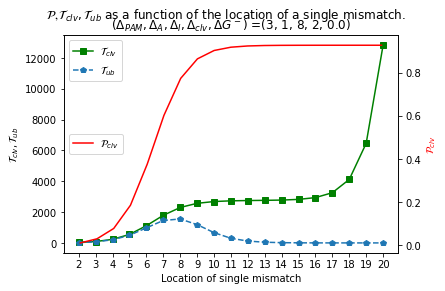

In [52]:
#Plotjes maken met Pclv, Tclv, Tub

row_format ="{:>3}" + "{:>17}" * 4
print row_format.format("MM", "Lambda", "psi", "tau", "tauub")
for j in range(N-2):
    print row_format.format(j+2, Lambda[j], psi[j], tau[j], tauub[j])
    
    
xas = range(2,N)
xlabel = ['PAM']+range(2,N)+['clv']
title = '$\mathcal{P,T}_{clv},\mathcal{T}_{ub}$ as a function of the location of a single mismatch.'
xtext = 'Location of single mismatch'
y1text = '$\mathcal{T}_{clv},\mathcal{T}_{ub}$'
y2text = '$\mathcal{P}_{clv}$'

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(xas, tau, color='green',marker='s')
ax1.plot(xas, tauub, 'p--')
ax2.plot(xas, Lambda, 'r')

ax1.set_xlabel(xtext)
ax1.set_ylabel(y1text)
ax2.set_ylabel(y2text, color='r')
plt.xticks(range(1,N+1), xlabel)

plt.suptitle(title)
plt.title('($\Delta_{PAM}, \Delta_A, \Delta_I, \Delta_{clv}, \Delta G^-$) =' + str((Dpam, Da, Di, Dc, DGmin)))
ax1.legend(['$\mathcal{T}_{clv}$', '$\mathcal{T}_{ub}$'], loc=2)
ax2.legend(['$\mathcal{P}_{clv}$'], loc=6)

#plt.savefig('..\..\Afbeeldingen\SMMclv', bbox_inches = 'tight', dpi = 300)
plt.show()

